In [1]:
import requests
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from adjustText import adjust_text
import time

K-means using sklearn

In [2]:
# 1. Fetch data from OpenWeatherMap API
API_KEY = '54248532ff82c2114d1f61f8c1632333'
cities = [
   'London', 'New York', 'Paris', 'Tokyo', 'Mumbai', 'Beijing', 'Berlin', 
   'Sydney', 'Cairo', 'Rio de Janeiro', 'Moscow', 'Cape Town', 'Toronto', 
   'Buenos Aires', 'Bangkok', 'Dubai', 'Singapore', 'Seoul', 'Los Angeles', 
   'Mexico City'
]
weather_data = []

for city in cities:
   url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={API_KEY}&units=metric"
   response = requests.get(url)
   if response.status_code == 200:
      data = response.json()
      weather_data.append({
         'city': city,
         'temperature': data['main']['temp'],
         'humidity': data['main']['humidity']
      })

In [3]:
# 2. Convert to DataFrame
df = pd.DataFrame(weather_data)

df["temperature"] = pd.to_numeric(df["temperature"], errors="coerce")
df["humidity"] = pd.to_numeric(df["humidity"], errors="coerce")

df.dtypes

city            object
temperature    float64
humidity         int64
dtype: object

In [4]:
# 3. Perform K-Means Clustering

start_time = time.time()

X = df[['temperature', 'humidity']]
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

end_time = time.time()

elapsed_time = end_time - start_time

print(f"Time taken: {elapsed_time:.6f} seconds")

Time taken: 0.356282 seconds


c:\Users\lfenelon\AppData\Local\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


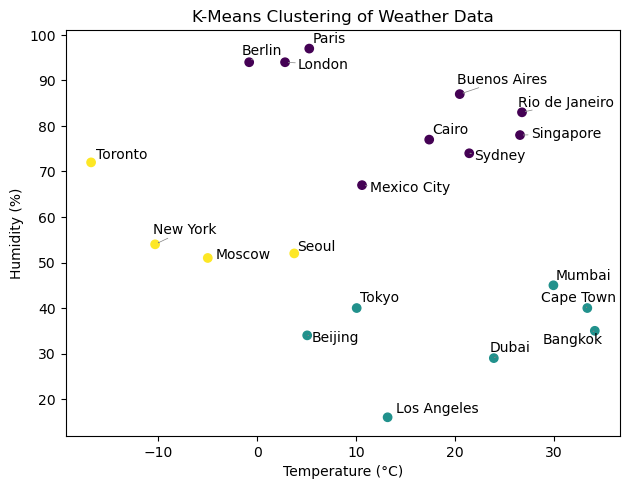

In [5]:
# 4. Visualize the Clusters
plt.scatter(df['temperature'], df['humidity'], c=df['cluster'], cmap='viridis')
plt.xlabel('Temperature (°C)')
plt.ylabel('Humidity (%)')

texts = []
for i, row in df.iterrows():
    texts.append(plt.text(row['temperature'], row['humidity'], row['city'], fontsize=10))
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray', lw=0.5))

plt.tight_layout()
plt.title('K-Means Clustering of Weather Data')
plt.show()

In [6]:
# Print the results
print(df)

              city  temperature  humidity  cluster
0           London         2.83        94        0
1         New York       -10.32        54        2
2            Paris         5.28        97        0
3            Tokyo        10.08        40        1
4           Mumbai        29.99        45        1
5          Beijing         5.07        34        1
6           Berlin        -0.80        94        0
7           Sydney        21.47        74        0
8            Cairo        17.42        77        0
9   Rio de Janeiro        26.81        83        0
10          Moscow        -4.99        51        2
11       Cape Town        33.42        40        1
12         Toronto       -16.80        72        2
13    Buenos Aires        20.51        87        0
14         Bangkok        34.18        35        1
15           Dubai        23.96        29        1
16       Singapore        26.61        78        0
17           Seoul         3.76        52        2
18     Los Angeles        13.21

K-means from scratch

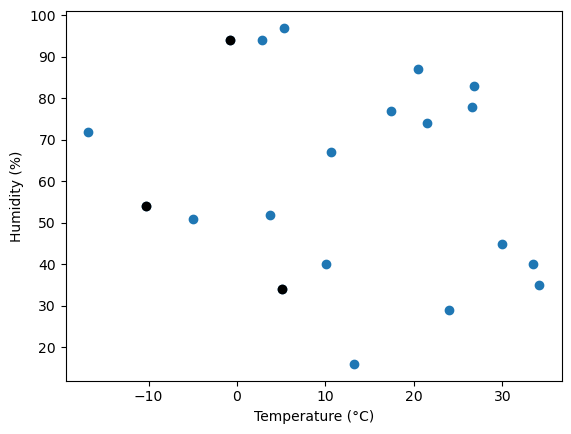

,city,temperature,humidity,cluster
0,London,2.83,94,0
1,New York,-10.32,54,2
2,Paris,5.28,97,0
3,Tokyo,10.08,40,1
4,Mumbai,29.99,45,1
5,Beijing,5.07,34,1
6,Berlin,-0.80,94,0
7,Sydney,21.47,74,0
8,Cairo,17.42,77,0
9,Rio de Janeiro,26.81,83,0


In [7]:
# Initialise Centroids
K=3
centroids = df.sample(n=K)
plt.scatter(df['temperature'], df['humidity'])
plt.scatter(centroids['temperature'],centroids['humidity'],c='black')
plt.xlabel('Temperature (°C)')
plt.ylabel('Humidity (%)')
plt.show()

mask = df['city'].isin(centroids.city.tolist())
df


In [8]:
start_time = time.time()

# Calculate distance between centroids and data points using Euclidean Distance metric.
X = df[~mask]
diff = 1
j=0
XD=X

while diff!=0:
    i=1
    for index1,row_c in centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["temperature"]-row_d["temperature"])**2
            d2=(row_c["humidity"]-row_d["humidity"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1

    # Assign data points to nearest centroid to get clusters
    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C

    # Calculate average temperatures and humidities and reinitialise centroids
    centroids_new = X.groupby("Cluster")[["temperature", "humidity"]].mean()
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (centroids_new['humidity'] - centroids['humidity']).sum() + (centroids_new['temperature'] - centroids['temperature']).sum()
    centroids = centroids_new
    
end_time = time.time()

elapsed_time = end_time - start_time

print(f"Time taken: {elapsed_time:.6f} seconds")
print(centroids)
X

Time taken: 0.017630 seconds
         temperature   humidity
Cluster                        
1          17.275714  84.285714
2          24.140000  34.166667
3          -1.852500  60.500000


C:\Users\lfenelon\AppData\Local\Temp\ipykernel_42060\696848934.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i]=ED
C:\Users\lfenelon\AppData\Local\Temp\ipykernel_42060\696848934.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i]=ED
C:\Users\lfenelon\AppData\Local\Temp\ipykernel_42060\696848934.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:/

,city,temperature,humidity,cluster,1,2,3,Cluster
0,London,2.83,94,0,17.408217,63.514911,33.825668,1
2,Paris,5.28,97,0,17.479995,65.602800,37.190356,1
3,Tokyo,10.08,40,1,44.866500,15.222069,23.719919,2
4,Mumbai,29.99,45,1,41.291893,12.311930,35.414613,2
7,Sydney,21.47,74,0,11.108013,39.922717,26.947894,1
8,Cairo,17.42,77,0,7.287143,43.357270,25.370835,1
9,Rio de Janeiro,26.81,83,0,9.620585,48.906271,36.438838,1
10,Moscow,-4.99,51,2,40.046233,33.643989,10.004694,3
11,Cape Town,33.42,40,1,47.136636,10.961121,40.797050,2
12,Toronto,-16.80,72,2,36.222825,55.744459,18.859421,3


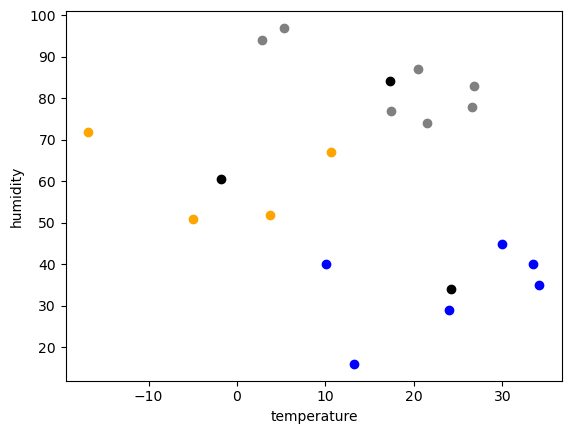

In [9]:
colour=['grey','blue','orange']
for k in range(K):
   data=X[X["Cluster"]==k+1]
   plt.scatter(data["temperature"],data["humidity"],c=colour[k])
plt.scatter(centroids["temperature"],centroids["humidity"],c='black')
plt.xlabel('temperature')
plt.ylabel('humidity')
plt.show()